Loaded precession_0_500kyr_inter100, available keys: dict_keys(['__header__', '__version__', '__globals__', 'precession_0_500kyr_inter100'])
Loaded AICC2012_edc_d18O_stenni_2010, available keys: dict_keys(['__header__', '__version__', '__globals__', 'AICC2012_edc_d18O_stenni_2010'])
Loaded ngrip_modelex_b2k_inter50_Ras2014, available keys: dict_keys(['__header__', '__version__', '__globals__', 'ngrip_modelex_b2k_inter50_Ras2014'])


Text(0.5, 0, 'Time (kyr)')

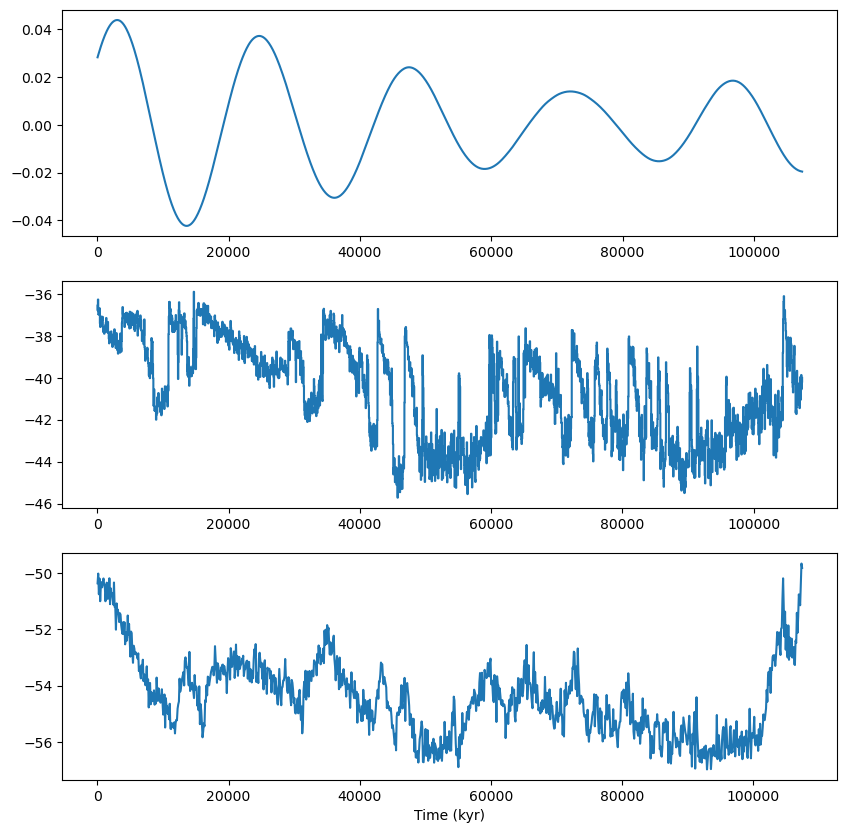

In [64]:
import scipy.io as sio
import os
import numpy as np
import matplotlib.pyplot as plt

# Directory where your .mat files are stored
mat_dir = r"D:\VScode\bipolar_seesaw_CCM\Matlab_files"

# 1) Load precession_0_500kyr_inter100.mat
file1 = os.path.join(mat_dir, "precession_0_500kyr_inter100.mat")
mat_contents_file1 = sio.loadmat(file1)
precession_0_500kyr_inter100 = mat_contents_file1['precession_0_500kyr_inter100']
print("Loaded precession_0_500kyr_inter100, available keys:", mat_contents_file1.keys())

# 2) Load AICC2012_edc_d18O_stenni_2010.mat
file2 = os.path.join(mat_dir, "AICC2012_edc_d18O_stenni_2010.mat")
mat_contents_file2 = sio.loadmat(file2)
AICC2012_edc_d18O_stenni_2010 = mat_contents_file2['AICC2012_edc_d18O_stenni_2010']
print("Loaded AICC2012_edc_d18O_stenni_2010, available keys:", mat_contents_file2.keys())

# 3) Load ngrip_modelex_b2k_inter50_Ras2014.mat
file3 = os.path.join(mat_dir, "ngrip_modelex_b2k_inter50_Ras2014.mat")
mat_contents_file3 = sio.loadmat(file3)
ngrip_modelex_b2k_inter50_Ras2014 = mat_contents_file3['ngrip_modelex_b2k_inter50_Ras2014']
print("Loaded ngrip_modelex_b2k_inter50_Ras2014, available keys:", mat_contents_file3.keys())

pre = precession_0_500kyr_inter100
edc = AICC2012_edc_d18O_stenni_2010
ngrip = ngrip_modelex_b2k_inter50_Ras2014

# # plot three datasets
# import matplotlib.pyplot as plt

# fig, ax = plt.subplots(3, 1, figsize=(10, 10), sharex=False)
# ax[0].plot(pre[:,0], pre[:,1], label='precession_0_500kyr_inter100')
# ax[1].plot(ngrip[:,0], ngrip[:,1], label='ngrip_modelex_b2k_inter50_Ras2014')
# ax[2].plot(edc[:,0], edc[:,1], label='AICC2012_edc_d18O_stenni_2010')

# ax[2].set_xlabel('Time (kyr)')


pre[:,0] = pre[:,0] *- 1000
# pre[:,0] = pre[:,0]*-1+max(pre[:,0])
# ngrip[:,0] = ngrip[:,0] *-1+max(ngrip[:,0])
# edc[:,0] = edc[:,0] *-1+max(edc[:,0])

# resample the edc data to 100 year resolution
from scipy.interpolate import interp1d
f = interp1d(edc[:,0], edc[:,1])
# create a new time vector
# edc_new_time =[i for i in range(int(np.ceil(min(edc[:,0]))), int(np.floor(max(edc[:,0]))), 100)]
# edc_new_time =11703:100 119140
edc_new_time = np.arange(11703, 119140, 100)
edc_new_data = f(edc_new_time)

edc = np.column_stack((edc_new_time, edc_new_data))

# crop pre between 11703 and 119140
pre = pre[pre[:,0] >= 11703]
pre = pre[pre[:,0] <= 119140]

ngrip = ngrip[ngrip[:,0] >= 11703]
ngrip = ngrip[ngrip[:,0] <= 119140]

edc[:,0] = edc[:,0]*-1+119140
pre[:,0] = pre[:,0]*-1+119140
ngrip[:,0] = ngrip[:,0]*-1+119140

# flip pre, edc and ngrip upside down
pre = np.flipud(pre)
edc = np.flipud(edc)
ngrip = np.flipud(ngrip)

fig, ax = plt.subplots(3, 1, figsize=(10, 10), sharex=False)
ax[0].plot(pre[:,0], pre[:,1], label='precession_0_500kyr_inter100')
ax[1].plot(ngrip[:,0], ngrip[:,1], label='ngrip_modelex_b2k_inter50_Ras2014')
ax[2].plot(edc[:,0], edc[:,1], label='AICC2012_edc_d18O_stenni_2010')

ax[2].set_xlabel('Time (kyr)')


In [59]:
import matplotlib.pyplot as plt
import numpy as np

def generate_dummy_AT(data, w_slope=1, c_slope=1,
                      if_plot=False,
                      if_interpolate=False,
                      interp_res=100):


    starts = data["start"]
    ends   = data["end"]

    n = len(starts)
    
    times = []
    temps = []

    # Current temperature, starts at 0 when t = starts[-1]
    T_current = 0.0
    t_current = starts[-1]

    times.append(t_current)
    temps.append(T_current)

    # Walk through the events from the last one (n-1) down to 0
    for i in reversed(range(n)):
        # Possibly "jump" to start[i] if there's a gap
        if t_current != starts[i]:
            step = -1 if t_current > starts[i] else 1
            while t_current != starts[i]:
                t_current += step
                times.append(t_current)
                temps.append(T_current)

        # WARMING: from start[i] down to end[i]
        if starts[i] > ends[i]:
            step = -1  # descending in time
        else:
            step = 1   # (in case the data were reversed)

        # Each 1-step in time changes T by +w_slope (if descending in time)
        while t_current != ends[i]:
            t_current += step
            if step < 0:
                # descending in time => warming => +w_slope
                T_current += w_slope
            else:
                # ascending in time => "warming" is the opposite sign
                T_current -= w_slope
            
            times.append(t_current)
            temps.append(T_current)

        # COOLING: from end[i] down to start[i-1], except if i=0
        if i > 0:
            if ends[i] > starts[i-1]:
                step = -1
            else:
                step = 1

            while t_current != starts[i-1]:
                t_current += step
                if step < 0:
                    # descending => cooling => -c_slope
                    T_current -= c_slope
                else:
                    # ascending => "cooling" => +c_slope
                    T_current += c_slope

                times.append(t_current)
                temps.append(T_current)
        else:
            # i == 0 means no previous event
            pass

    # Convert to NumPy arrays
    times = np.array(times, dtype=float)
    temps = np.array(temps, dtype=float)


    if if_interpolate:
        # Ensure ascending time for np.interp
        if times[0] > times[-1]:
            times_asc = times[::-1]
            temps_asc = temps[::-1]
        else:
            times_asc = times
            temps_asc = temps

        t_min, t_max = times_asc[0], times_asc[-1]  # ascending
        # Build a new time array in ascending order
        new_times_asc = np.arange(t_min, t_max + 1, interp_res)
        # Interpolate
        new_temps_asc = np.interp(new_times_asc, times_asc, temps_asc)

        # Flip back to descending order
        times = new_times_asc[::-1]
        temps = new_temps_asc[::-1]

    # Stack into a single array: (N, 2)
    out = np.column_stack((times, temps))

    # flip the array so that time is descending
    # out = out[::-1]

    # Plot if required
    if if_plot:
        plt.figure()
        plt.plot(out[:, 0], out[:, 1])  # time vs. temperature
        plt.xlabel("Time (descending)")
        plt.ylabel("Temperature")
        plt.title("Dummy Temperature Time Series")
        plt.show()

    return out


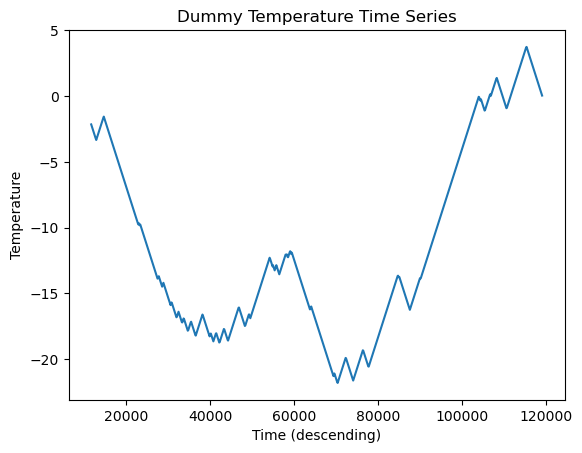

In [73]:
import numpy as np

data = {
    "event": ["GS-1", "GS-2.1c", "GS-2.2", "GS-3", "GS-4", "GS-5.1", "GS-5.2", "GS-6", "GS-7", "GS-8",
              "GS-9", "GS-10", "GS-11", "GS-12", "GS-13", "GS-14", "GS-15.1", "GS-15.2", "GS-16.1", "GS-16.2",
              "GS-17.1", "GS-17.2", "GS-18", "GS-19.1", "GS-19.2", "GS-20", "GS-21.1", "GS-21.2", "GS-22",
              "GS-23.1", "GS-23.2", "GS-24.1", "GS-24.2", "GS-25", "GS-26"],
    "end":   [11703, 14692, 23020, 23340, 27780, 28900, 30840, 32500, 33740, 35480,
              38220, 40160, 41460, 43340, 46860, 49280, 54220, 55000, 55800, 58040,
              58280, 59080, 59440, 64100, 69620, 72340, 76440, 84760, 85060, 90040,
              104040, 104520, 106750, 108280, 115370],
    "start": [12896, 22900, 23220, 27540, 28600, 30600, 32040, 33360, 34740, 36580,
              39900, 40800, 42240, 44280, 48340, 49600, 54900, 55400, 56500, 58160,
              58560, 59300, 63840, 69400, 70380, 74100, 77760, 84960, 87600, 90140,
              104380, 105440, 106900, 110640, 119140]
}

dummy_AT = generate_dummy_AT(data, w_slope=0.001, c_slope=0.001,
                                  if_plot=True,
                                  if_interpolate=True,
                                  interp_res=100)

dummy_AT[:,0] = dummy_AT[:,0]*-1+119140

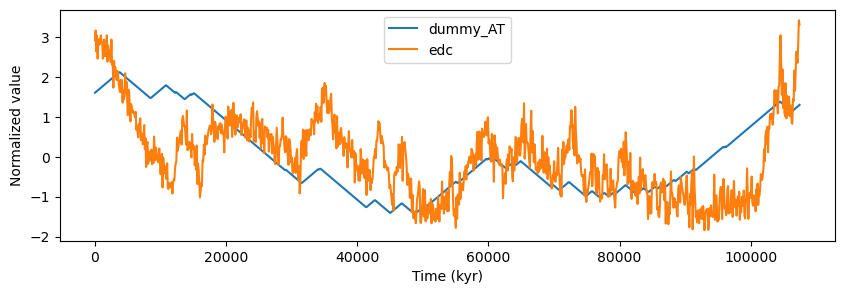

In [74]:
# plot normalized dummy_AT against edc in the same figure
from scipy.stats import zscore
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3))
plt.plot(dummy_AT[:,0], zscore(dummy_AT[:,1]), label='dummy_AT')
plt.plot(edc[:,0], zscore(edc[:,1]), label='edc')
plt.legend()
plt.xlabel('Time (kyr)')
plt.ylabel('Normalized value')
plt.show()


In [7]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from scipy.stats import zscore

def bandpass_filter(edc, show=False, order=2):
    """
    Apply a band-pass filter to the 'pre' column of the edc time series.
    
    Parameters:
        edc (ndarray): 2D array with shape (5001,2). 
                       First column is age (with a step of 100 years), 
                       second column is the signal to filter.
        show (bool):   If True, plot the original and filtered signals.
        order (int):   Order of the Butterworth filter (default is 2).
        
    Returns:
        filtered_signal (ndarray): The filtered signal (1D array).
    """
    # Extract time and signal data
    time = edc[:, 0]
    signal = edc[:, 1]
    
    # Determine the sampling interval and sampling frequency
    dt = time[1] - time[0]   # should be 100 years
    fs = 1.0 / dt            # sampling frequency in samples/year
    nyq = fs / 2.0           # Nyquist frequency
    
    # Define the band (in terms of periods, then convert to frequencies)
    low_period = 25000.0     # years
    high_period = 15000.0    # years
    low_cut = 1.0 / low_period    # low cutoff frequency (cycles/year)
    high_cut = 1.0 / high_period  # high cutoff frequency (cycles/year)
    
    # Normalize cutoff frequencies by the Nyquist frequency
    low = low_cut / nyq
    high = high_cut / nyq
    
    # Design the Butterworth band-pass filter
    b, a = butter(order, [low, high], btype='band')
    
    # Filter the signal using filtfilt for zero-phase filtering
    filtered_signal = filtfilt(b, a, signal)
    
    # Optionally plot the original and filtered signals for comparison
    if show:
        plt.figure(figsize=(10, 6))
        plt.plot(time, zscore(signal), label='Original', alpha=0.7)
        plt.plot(time, zscore(filtered_signal), label='Filtered', linewidth=2)
        plt.xlabel('Age (years)')
        plt.ylabel('Signal (normalized)')
        plt.title(f'Band-pass Filtering (Period {int(low_period)} - {int(high_period)} years)')
        plt.legend()
        plt.grid(True)
        plt.show()
    
    return filtered_signal


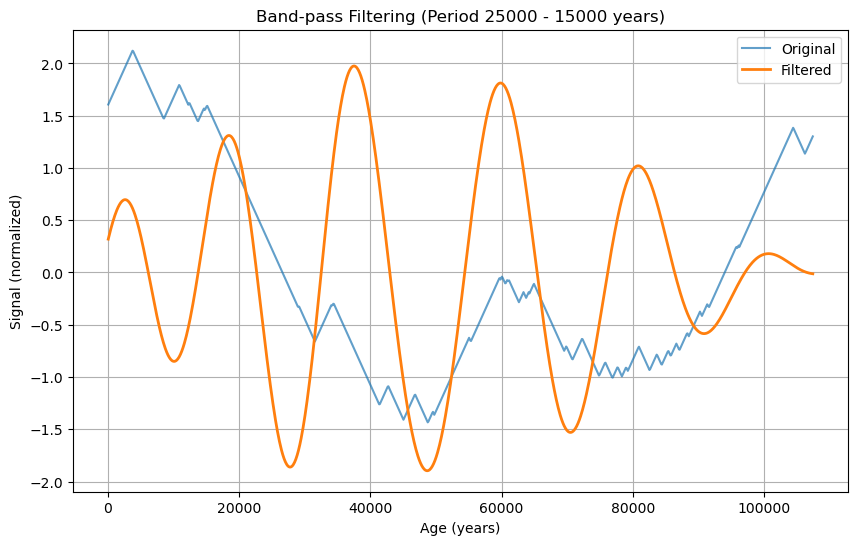

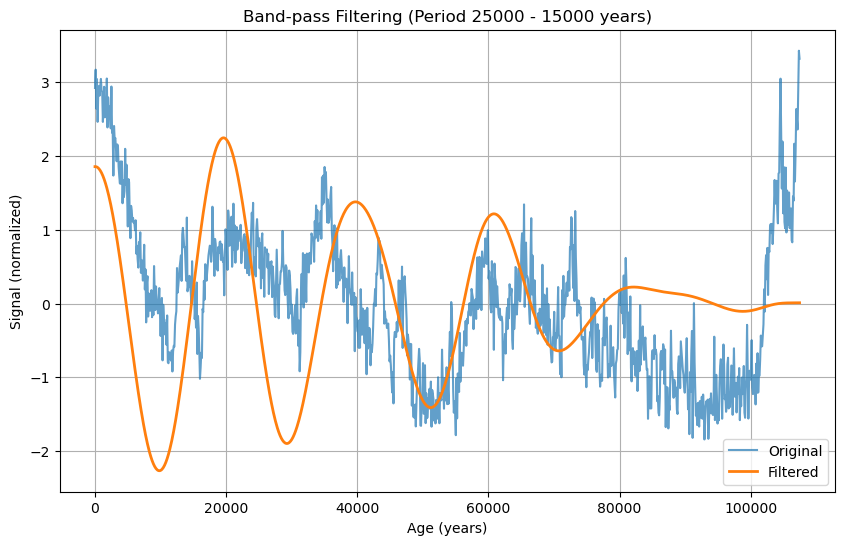

In [75]:
dummy_AT_pre=bandpass_filter(dummy_AT, show=True, order=2)
edc_pre = bandpass_filter(edc, show=True, order=2)

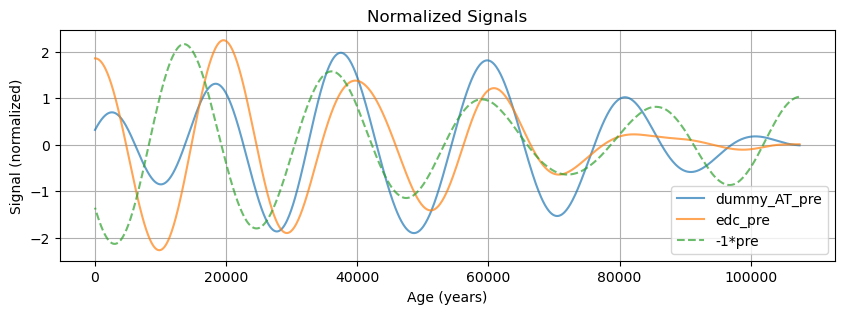

In [76]:
# plot normalized (using zscore) dummy_AT_pre, edc_pre and pre in a single plot
from scipy.stats import zscore

plt.figure(figsize=(10, 3))
plt.plot(dummy_AT[:,0], zscore(dummy_AT_pre), label='dummy_AT_pre', alpha=0.7)
plt.plot(edc[:,0], zscore(edc_pre), label='edc_pre', alpha=0.7)
plt.plot(pre[:,0], zscore(pre[:,1])*-1, label='-1*pre', alpha=0.7, linestyle='--')
plt.xlabel('Age (years)')
plt.ylabel('Signal (normalized)')
plt.title('Normalized Signals')
plt.legend()
plt.grid(True)
plt.show()


In [101]:
dummy_AT.shape

(1075, 2)

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

def plot_psd_dummy_AT(dummy_AT):

    # Extract time and values
    time = dummy_AT[:, 0]
    values = dummy_AT[:, 1]

    # Sampling interval and frequency
    dt = time[1] - time[0]  # should be 100
    fs = 1.0 / dt           # 0.01

    f, Pxx = welch(values, fs=fs, window='hann', nperseg=900, noverlap=100)

    # A very naive significance threshold: mean + 2*std of the PSD
    threshold = np.mean(Pxx) + 2.0 * np.std(Pxx)

    # Plot the PSD on a log-log scale
    plt.figure(figsize=(8,5))
    plt.loglog(f, Pxx, label='Welch PSD')
    plt.axhline(threshold, color='r', linestyle='--', label='Naive threshold')
    # plot vertical line at 1/20000 and 1/40000
    plt.axvline(1/20000, color='g', linestyle='--', label='Period 20000 years')
    plt.axvline(1/40000, color='b', linestyle='--', label='Period 40000 years')
    # set x limt to be smaller than 1/10000
    # plt.xlim(0,0.001)
    plt.title('Power Spectral Density of dummy_AT')
    plt.xlabel('Frequency (1/time unit)')
    plt.ylabel('PSD')
    plt.legend()
    plt.tight_layout()
    plt.show()

    return f, Pxx, threshold




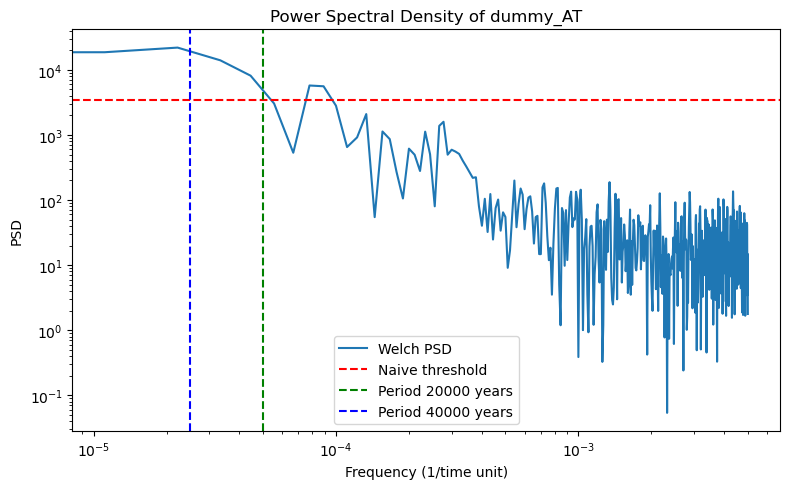

In [112]:
f, Pxx, threshold = plot_psd_dummy_AT(edc)

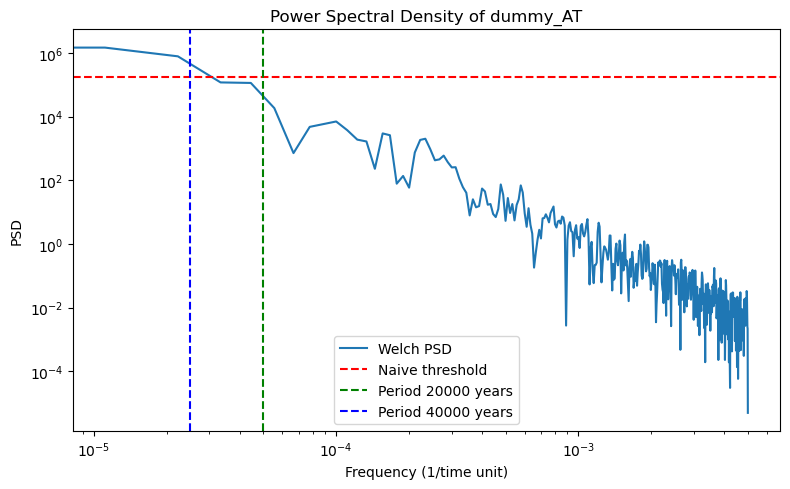

In [113]:

f, Pxx, threshold = plot_psd_dummy_AT(dummy_AT)

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from astropy.timeseries import LombScargle



# def do_lomb_scargle(dummy_AT, fap=0.001):
#     # Extract time (ascending) and values
#     time = dummy_AT[:, 0]
#     values = dummy_AT[:, 1]

#     ls = LombScargle(time, values)
#     frequency, power = ls.autopower()

#     power_threshold = ls.false_alarm_level(fap)

#     # Plot the Lomb-Scargle periodogram
#     plt.figure(figsize=(7,4))
#     plt.plot(frequency, power, label="Lomb-Scargle Power")
#     # plt.axhline(power_threshold, linestyle="--", label=f"{100*(1-fap):.1f}% Significance")
#     # SET xlim to be 0 to 0.01
#     plt.xlim(0, 0.05)
#     plt.xlabel("Frequency")
#     plt.ylabel("Power")
#     plt.title("Lomb-Scargle Periodogram")
#     plt.legend()
#     plt.tight_layout()
#     plt.show()

#     return frequency, power, power_threshold




In [114]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lombscargle

def do_lomb_scargle_scipy(dummy_AT, 
                          fmax=0.05, 
                          df=1e-5,
                          if_plot=True):

    # Extract time and values
    time = dummy_AT[:, 0]
    values = dummy_AT[:, 1]

    # Build a frequency array from 0 up to fmax with step df
    # (Avoid f=0 exactly to prevent division by zero in some versions)
    freqs = np.arange(df, fmax+df, df)

    # Compute the raw Lomb–Scargle power
    # Note: `scipy.signal.lombscargle` expects time and freqs in radians,
    # but typically we treat `time` as is. Just keep units consistent.
    power = lombscargle(time, values, freqs)

    # A naive significance threshold (not the same as false alarm probability!)
    power_threshold = np.mean(power) + 2.0 * np.std(power)

    if if_plot:
        plt.figure(figsize=(7,4))
        plt.plot(freqs, power, label="Scipy Lomb-Scargle Power")
        # Mark a naive threshold as a dashed line
        plt.axhline(power_threshold, color="r", linestyle="--", 
                    label="Naive threshold (mean + 2*std)")
        plt.xlim(0, fmax)
        plt.xlabel("Frequency")
        plt.ylabel("Power")
        plt.title("Lomb–Scargle Periodogram (scipy.signal)")
        plt.legend()
        plt.tight_layout()
        plt.show()

    return freqs, power, power_threshold


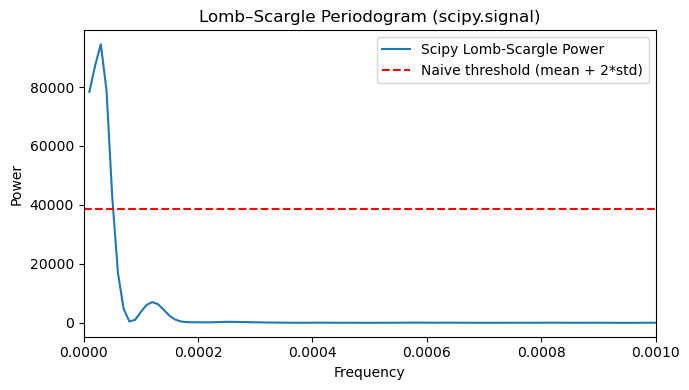

In [118]:

frequency, power, threshold = do_lomb_scargle_scipy(dummy_AT, fmax=0.001, df=1e-5, if_plot=True)